## Example of Context graph generation and visualization using dummy data

In [1]:
import expert
import pandas as pd
import random

In [2]:
def dummydata(scale=1):
    nodesDF = pd.DataFrame(columns=['nodeID','displayName','nodeType'])
    for k in expert.metadata.graph.nodeTypeColors.keys():
        for i in range(4*scale):
            nodesDF.loc[len(nodesDF)] = [k+str(i),k+str(i),k ]
            
    linksDF = pd.DataFrame(columns=['from','to','edgeType','fromNodeType','nodeType'])

    minSampleEdges = 2*scale
    maxSampleEdges = 8*scale
    
    for edgeType, k1Vals, k2Vals in [('Published In',['Paper'], ['Conference','Journal']),
                                    ('Attended', ['Scientist'], ['Conference']),
                                    ('Expert In', ['Scientist'], ['Topic/Expertise']),
                                    ('Located At', ['Conference','Institution'], ['Location']),
                                    ('Belongs To', ['Scientist'], ['Institution']),
                                    ('Related To', ['Journal','Conference','Paper'], ['Topic/Expertise']),
                                    ('Author Of', ['Scientist'], ['Paper'])]:
        for i in range(random.sample(range(minSampleEdges,maxSampleEdges),1)[0]):
            k1 = random.sample(k1Vals,1)[0]
            k2 = random.sample(k2Vals,1)[0]
            linksDF.loc[len(linksDF)] = [random.sample(list(nodesDF[nodesDF['nodeType']==k1]['nodeID']),1)[0],
                                     random.sample(list(nodesDF[nodesDF['nodeType']==k2]['nodeID']),1)[0],
                                     edgeType, k1,k2 ]
            
    nodesDF = nodesDF[nodesDF['nodeID'].isin(list(linksDF['from']) + list(linksDF['to']))].copy()

    linksDF
    
    return nodesDF, linksDF

    

## Example using small scale graph

In [3]:
nodesDF, linksDF = dummydata()

In [4]:
nodesDF.head()

,nodeID,displayName,nodeType
0,Paper0,Paper0,Paper
1,Paper1,Paper1,Paper
2,Paper2,Paper2,Paper
3,Paper3,Paper3,Paper
4,Scientist0,Scientist0,Scientist


In [5]:
linksDF.head()

,from,to,edgeType,fromNodeType,nodeType
0,Paper2,Conference3,Published In,Paper,Conference
1,Paper3,Conference3,Published In,Paper,Conference
2,Paper2,Journal0,Published In,Paper,Journal
3,Scientist2,Conference3,Attended,Scientist,Conference
4,Scientist3,Conference2,Attended,Scientist,Conference


### Visualize with labels

In [6]:
contextGraph = expert.metadata.graph.metadataGraph(linksDF, nodesDF, 
                   engine='sfdp', weighted=False, TB=True, figureSize=10, 
                   nodeSize=0.1, scaleEdges=1, name='Context Graph')

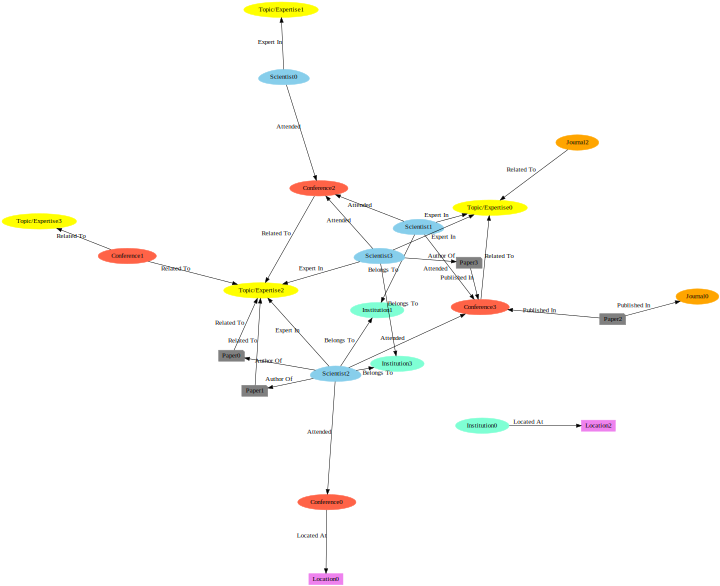

In [7]:
contextGraph.visualize()

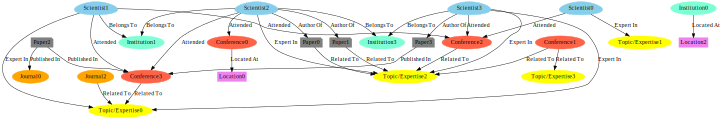

In [8]:
contextGraph.visualize(engine='dot', TB=True)

In [9]:
# save to PDF
contextGraph.save(engine='dot', TB=True, fn='example_graph-dot-TB-10', savedir='./')

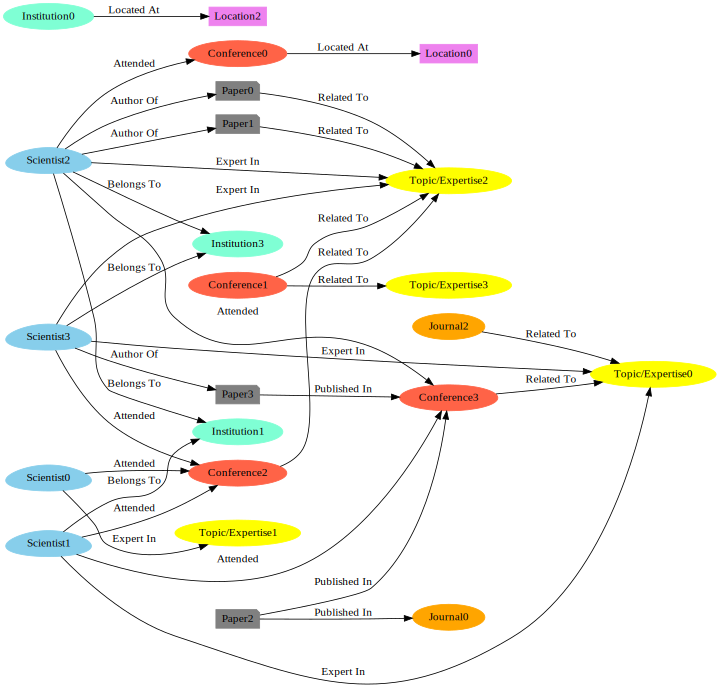

In [10]:
contextGraph.visualize(engine='dot',TB=False)

In [11]:
# save to PDF
contextGraph.save(engine='dot', TB=False, fn='example_graph-dot-LR-10', savedir='./')

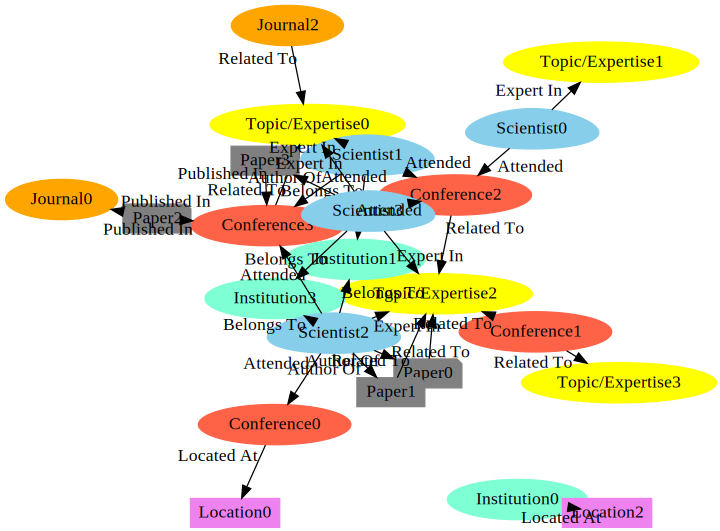

In [12]:
contextGraph.visualize(engine='neato')

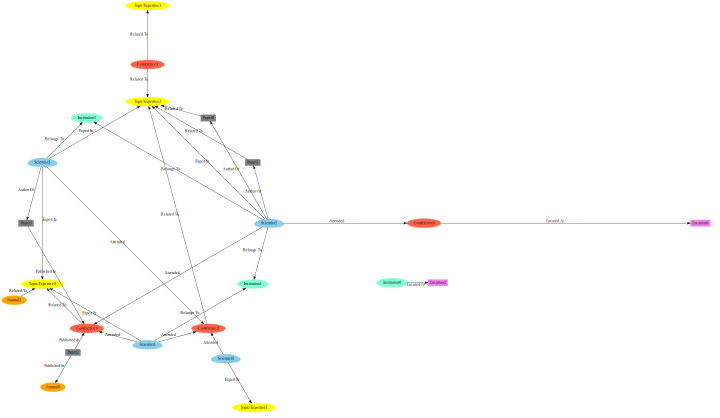

In [13]:
contextGraph.visualize(engine='circo')

### Visualize without labels

In [14]:

contextGraph2 = expert.metadata.graph.metadataGraph(linksDF, nodesDF, 
                   engine='sfdp', weighted=False, TB=True, figureSize=10, 
                   nodeSize=0.1, scaleEdges=1, name='Context Graph', displayLabels=False)


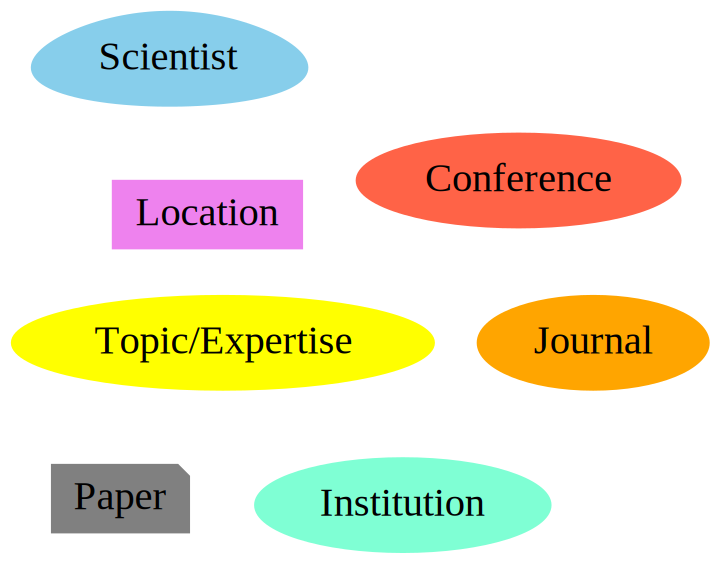

In [15]:
contextGraph2.legend()


In [16]:

# save legend to pdf, png, or dot formats
contextGraph2.legend(show=False, fn='example_graph_legend', savedir='./', 
                     pdf=True, png=True, dot=True)

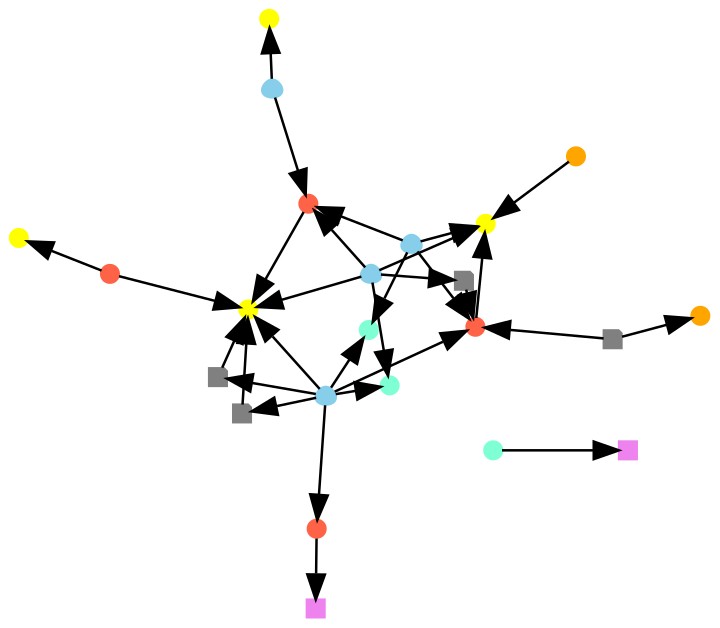

In [17]:
contextGraph2.visualize()

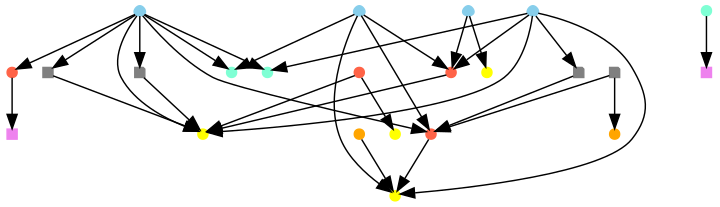

In [18]:
contextGraph2.visualize('dot')

## Larger Scale Graphs

In [19]:
nodesDF20, linksDF20 = dummydata(scale=20)

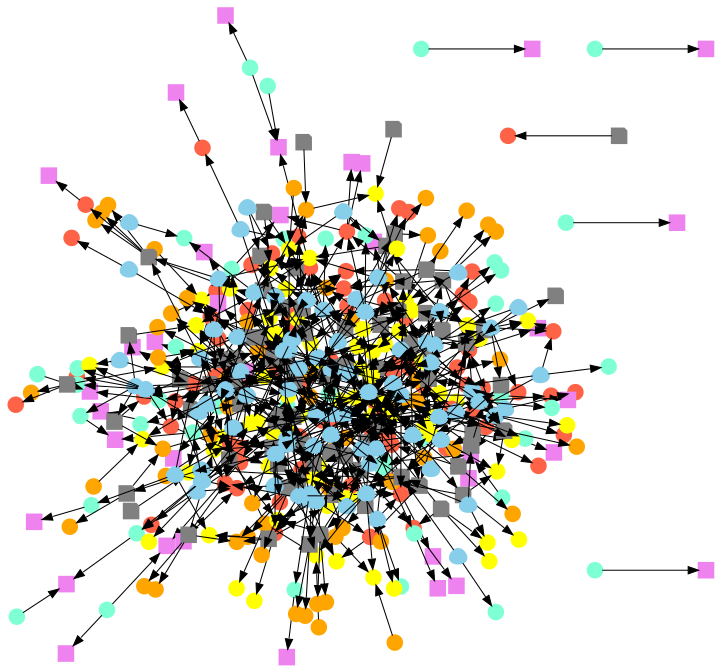

In [20]:
contextGraph20 = expert.metadata.graph.metadataGraph(linksDF20, nodesDF20, 
                   engine='sfdp', weighted=False, TB=True, figureSize=10, 
                   nodeSize=0.1, scaleEdges=0.5, name='Context Graph', displayLabels=False)

contextGraph20.visualize()

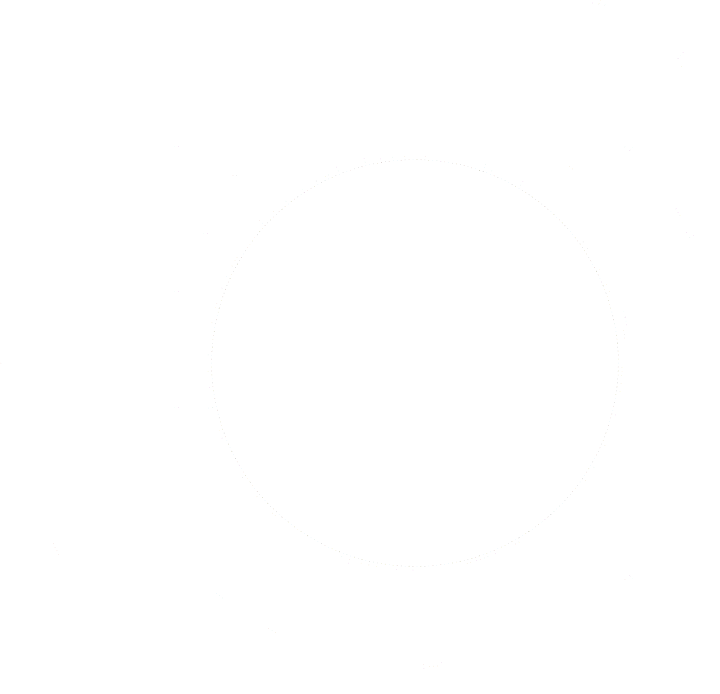

In [21]:
# much slower layout than sfdp
contextGraph20.visualize('circo')

In [22]:
contextGraph20_100 = expert.metadata.graph.metadataGraph(linksDF20, nodesDF20, 
                   engine='sfdp', weighted=False, TB=True, figureSize=100, 
                   nodeSize=0.1, scaleEdges=0.5, name='Context Graph', displayLabels=False)

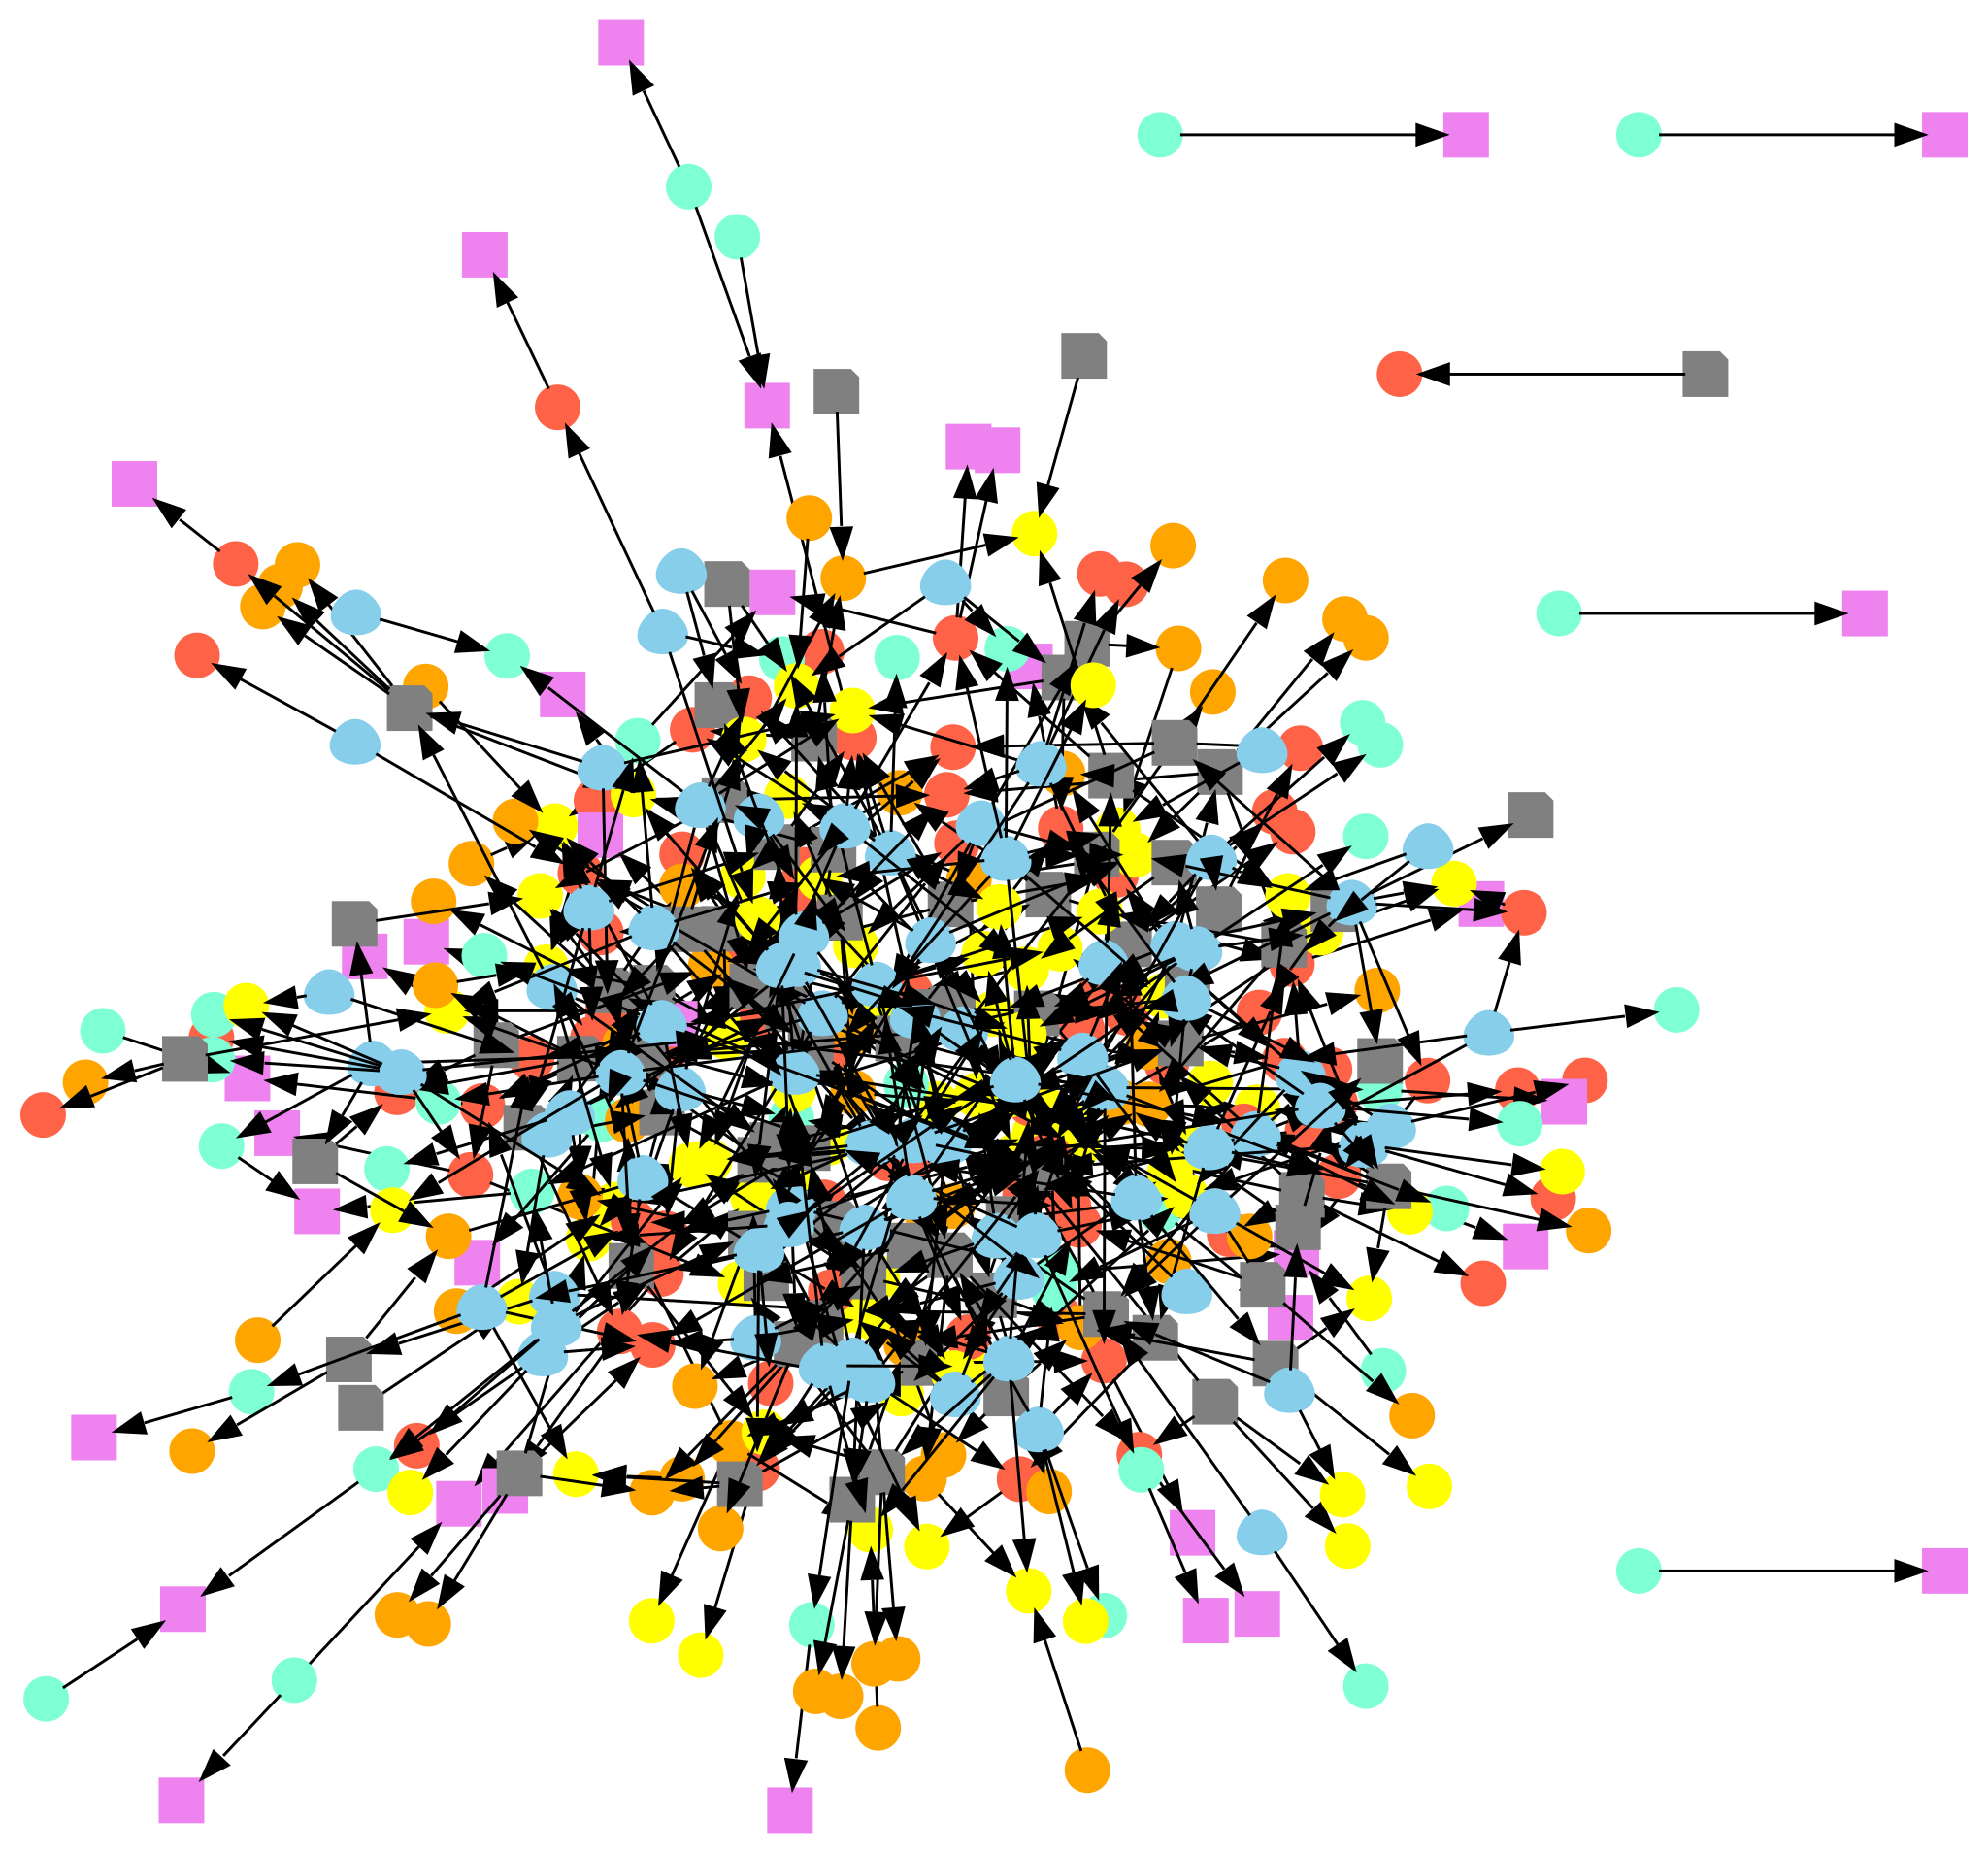

In [23]:
contextGraph20_100.visualize('sfdp')

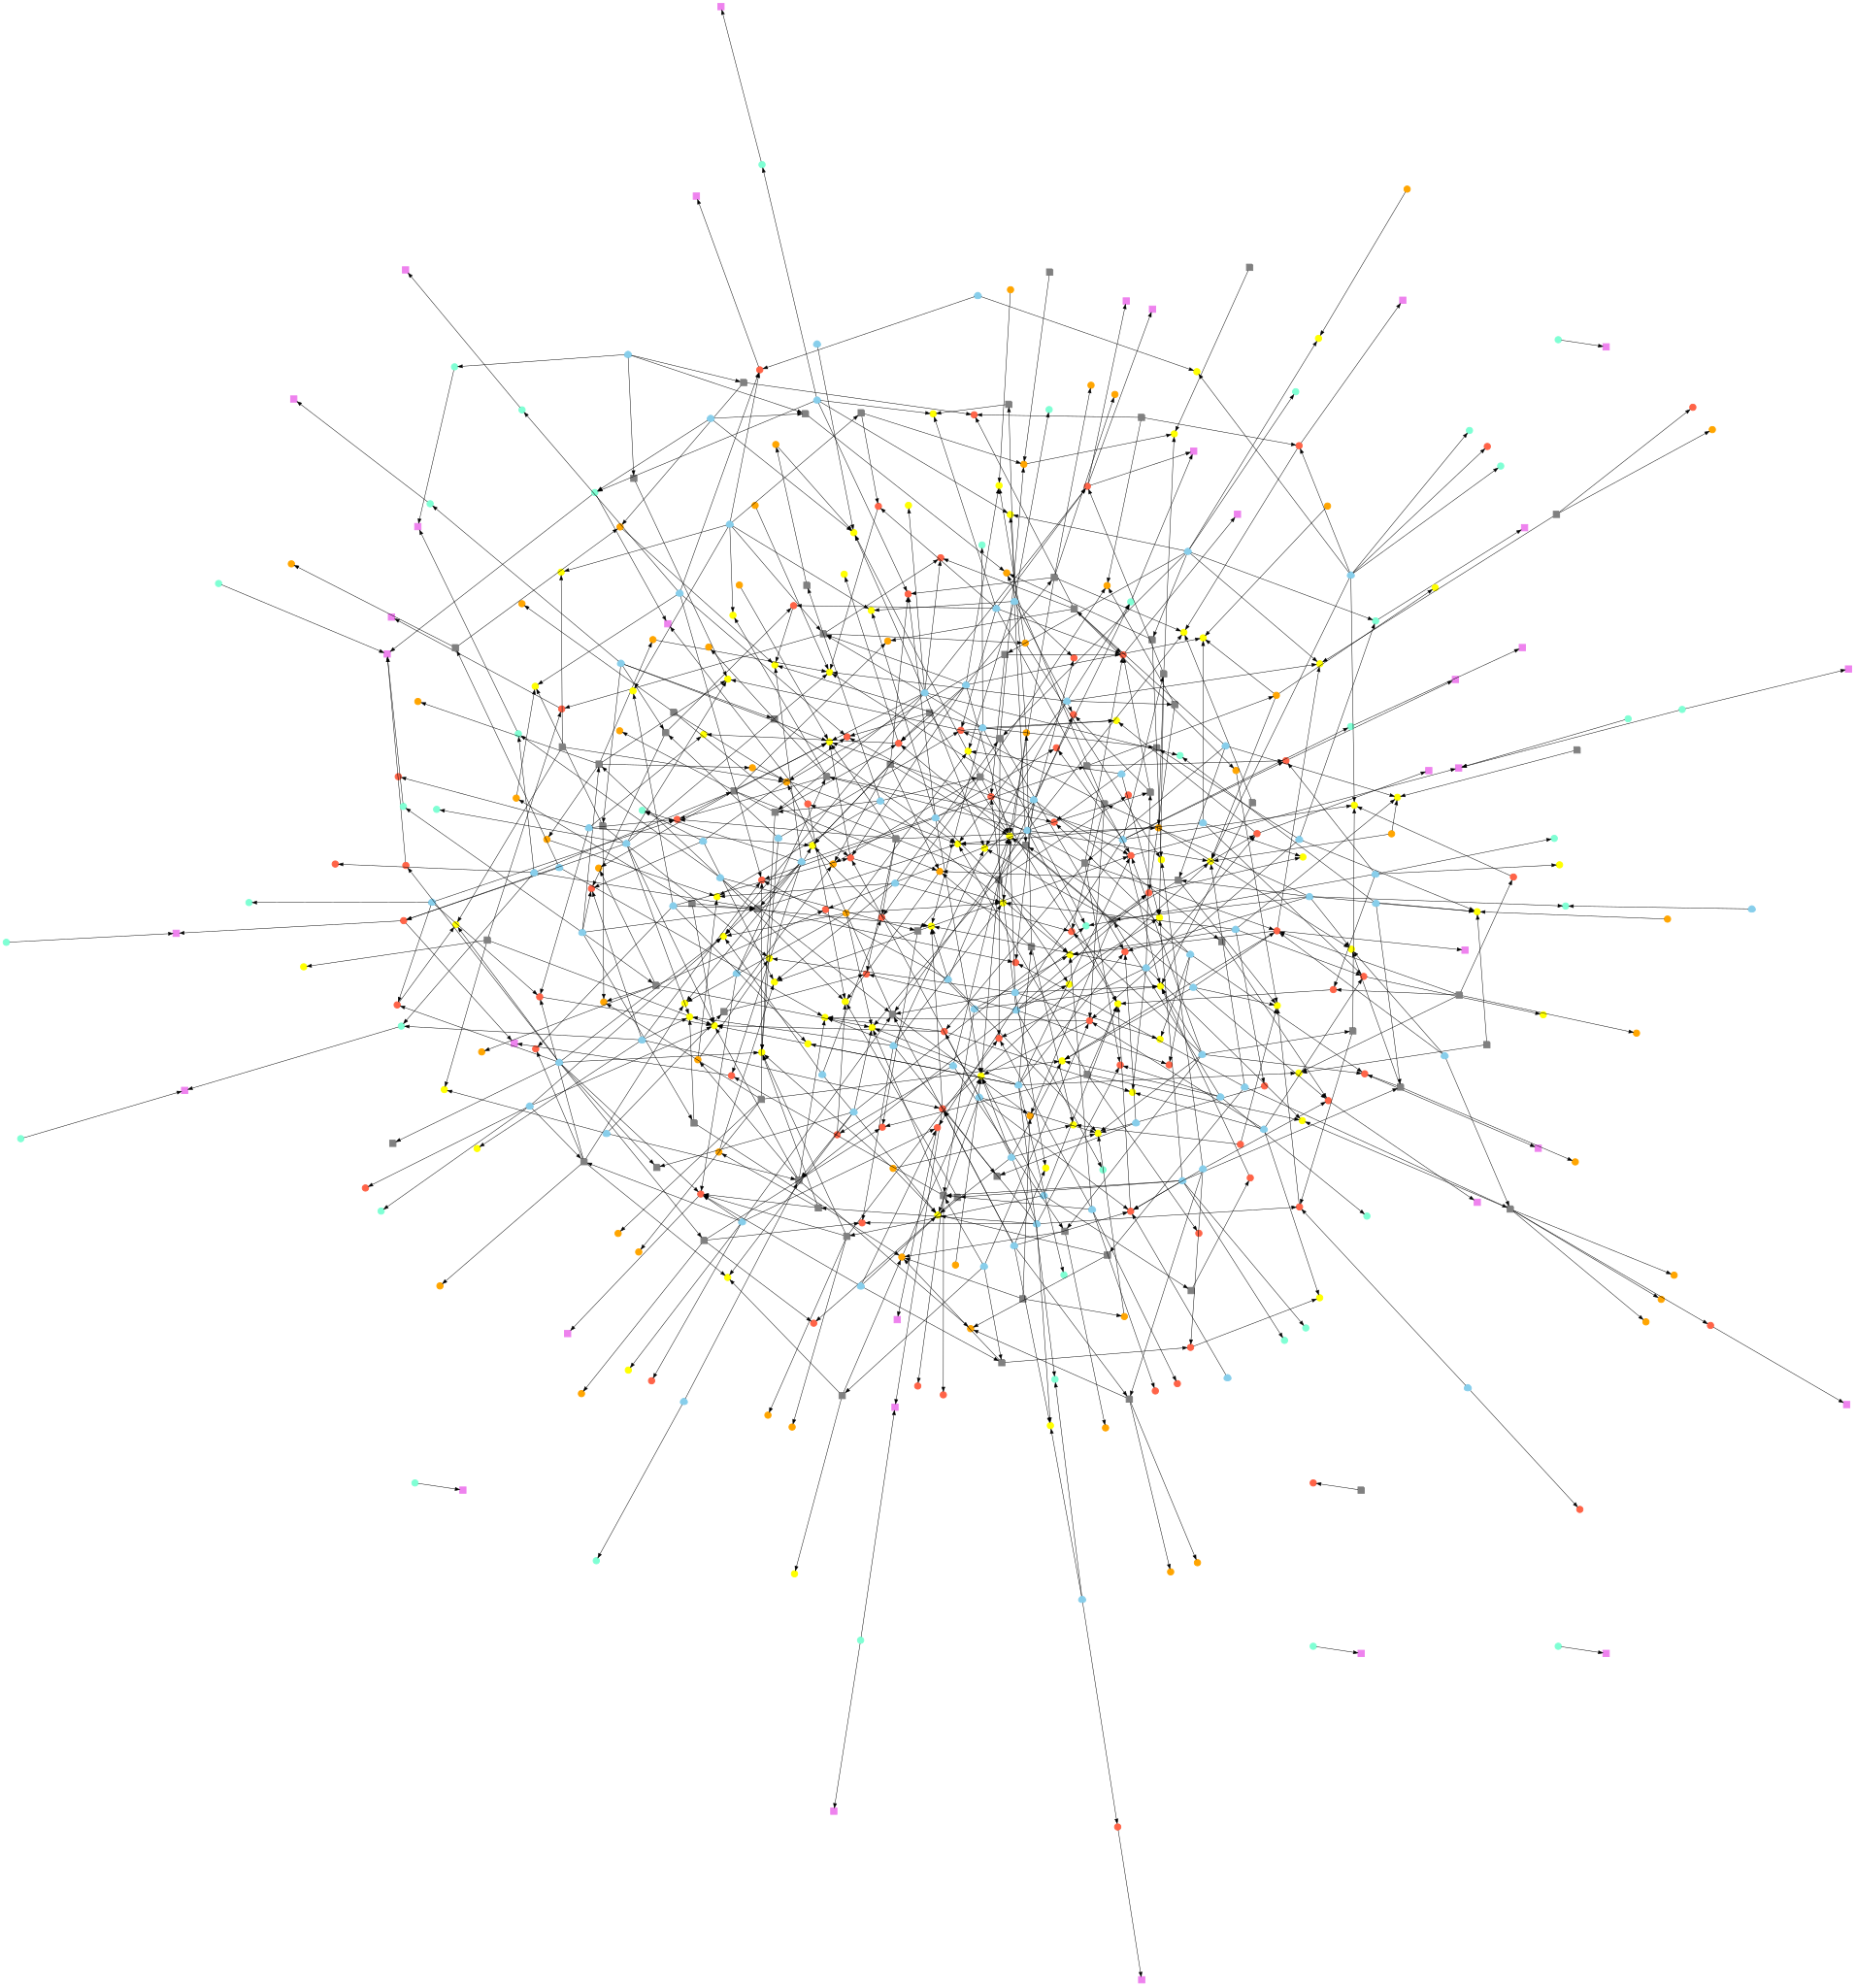

In [24]:
contextGraph20_100.visualize('fdp')